# Twitter Sentiment Analysis

This corpus is a monolingual resource of unique tweets about product reviews, with each tweet paired with an adversarial sentence. Both original and adversarial tweets are manually and automatically annotated according to sentiment polarity (positive, negative, neutral). The objective is to compare and evaluate both types of annotation.

In [1]:
!pip install transformers

In [2]:
!pip install tweepy --upgrade

     |████████████████████████████████| 66 kB 885 kB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## Get Tweets

In [2]:
%cd /content/drive/MyDrive/LAP/Subjects/BLR/Project/twitter-sentiment

/content/drive/MyDrive/LAP/Subjects/BLR/Project/twitter-sentiment


In [3]:
import tweepy

with open("auth.txt") as f:
    bearer_token = f.read().split()[2]

client = tweepy.Client(bearer_token=bearer_token)

# Replace with your own search query
query = 'entity:"Android" lang:en'
tweet_fields = ['context_annotations', 'entities', 'created_at']

tweets = client.search_recent_tweets(query=query, tweet_fields=tweet_fields, max_results=10)

for tweet in tweets.data:
    print(tweet.text)
    if len(tweet.context_annotations) > 0:
        print(tweet.context_annotations)

RT @moniwar_game: WHAT'S HOT ABOUT #MONIWAR?
 
✨ REAL game, REAL earning, released web &amp; Android version
✨ More than 8,000 people have made…
[{'domain': {'id': '47', 'name': 'Brand', 'description': 'Brands and Companies'}, 'entity': {'id': '10026820777', 'name': 'Android'}}, {'domain': {'id': '65', 'name': 'Interests and Hobbies Vertical', 'description': 'Top level interests and hobbies groupings, like Food or Travel'}, 'entity': {'id': '848920371311001600', 'name': 'Technology', 'description': 'Technology and computing'}}, {'domain': {'id': '30', 'name': 'Entities [Entity Service]', 'description': 'Entity Service top level domain, every item that is in Entity Service should be in this domain'}, 'entity': {'id': '848985956778561538', 'name': 'Mobile', 'description': 'Mobile'}}]
Trying out @theTunnelBear so I can browse privately from my ISP https://t.co/KVRsG22R67 https://t.co/uxz5DzEoE0
@bigcockbassey Hey your request is ready at https://t.co/INjdLP4tin I might not respond always,

In [4]:
import pandas as pd
tweets_df = pd.DataFrame(tweets.data)
tweets_df

,context_annotations,created_at,entities,id,text
0,"[{'domain': {'id': '47', 'name': 'Brand', 'des...",2022-02-02 11:58:21+00:00,"{'hashtags': [{'start': 35, 'end': 43, 'tag': ...",1488844232408322050,RT @moniwar_game: WHAT'S HOT ABOUT #MONIWAR?\n...
1,NaN,2022-02-02 11:58:18+00:00,"{'mentions': [{'start': 11, 'end': 25, 'userna...",1488844220538494979,Trying out @theTunnelBear so I can browse priv...
2,NaN,2022-02-02 11:58:17+00:00,"{'mentions': [{'start': 0, 'end': 14, 'usernam...",1488844216495136772,@bigcockbassey Hey your request is ready at ht...
3,NaN,2022-02-02 11:58:15+00:00,"{'mentions': [{'start': 0, 'end': 14, 'usernam...",1488844208295321611,@Erick30192606 Ding! Dong!! 🔔🔔 go to https://t...
4,"[{'domain': {'id': '65', 'name': 'Interests an...",2022-02-02 11:58:14+00:00,"{'hashtags': [{'start': 4, 'end': 8, 'tag': 'j...",1488844206256889862,New #job: Android Developer – Android / Mobile...
5,NaN,2022-02-02 11:58:12+00:00,"{'urls': [{'start': 220, 'end': 243, 'url': 'h...",1488844197750706180,“Blessed be the God and Father of our Lord Jes...
6,"[{'domain': {'id': '46', 'name': 'Brand Catego...",2022-02-02 11:58:11+00:00,"{'mentions': [{'start': 3, 'end': 13, 'usernam...",1488844193376124931,RT @elf_audio: Small update for iOS. Go get it...
7,"[{'domain': {'id': '47', 'name': 'Brand', 'des...",2022-02-02 11:58:08+00:00,"{'mentions': [{'start': 3, 'end': 15, 'usernam...",1488844180319318019,RT @AkwasiPogba: A friend of mine just told me...
8,"[{'domain': {'id': '47', 'name': 'Brand', 'des...",2022-02-02 11:58:05+00:00,"{'urls': [{'start': 256, 'end': 279, 'url': 'h...",1488844166788435969,Design is intelligence made visible\nGet an in...
9,NaN,2022-02-02 11:57:56+00:00,"{'mentions': [{'start': 0, 'end': 9, 'username...",1488844129798955014,@zemi_xyz Here is the link you asked for https...


## Analyse Tweets

### Wordclouds

In [5]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def create_wordcloud(text):
    wc = WordCloud(max_words=3000,
        stopwords=STOPWORDS,
        repeat=True)
    wc.generate(str(text))
    return wc

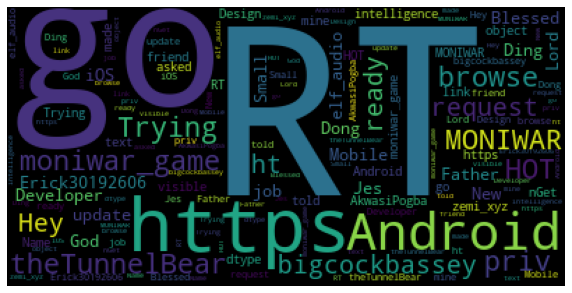

In [6]:
wc = create_wordcloud(tweets_df["text"])
plt.figure(figsize=(10, 10))
plt.imshow(wc)
plt.axis("off");

## Sentiment Analysis

### Negative / Positive

In [7]:
from transformers import pipeline
# with default model by huggingface
sentiment = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [8]:
sentiments = sentiment(list(tweets_df["text"]))
sentiments

[{'label': 'NEGATIVE', 'score': 0.8665958642959595},
 {'label': 'NEGATIVE', 'score': 0.9952096343040466},
 {'label': 'NEGATIVE', 'score': 0.9984018206596375},
 {'label': 'NEGATIVE', 'score': 0.9957423806190491},
 {'label': 'NEGATIVE', 'score': 0.9953632354736328},
 {'label': 'POSITIVE', 'score': 0.9711685180664062},
 {'label': 'NEGATIVE', 'score': 0.9894982576370239},
 {'label': 'NEGATIVE', 'score': 0.9977433681488037},
 {'label': 'POSITIVE', 'score': 0.9882993698120117},
 {'label': 'NEGATIVE', 'score': 0.9979962110519409}]

In [9]:
labels = [sent['label'] for sent in sentiments]
labels

['NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE']

In [10]:
scores = [round(sent['score'], 3) for sent in sentiments]
scores

[0.867, 0.995, 0.998, 0.996, 0.995, 0.971, 0.989, 0.998, 0.988, 0.998]

In [11]:
tweets_df['sentiment'] = labels
tweets_df['score'] = scores
tweets_df

,context_annotations,created_at,entities,id,text,sentiment,score
0,"[{'domain': {'id': '47', 'name': 'Brand', 'des...",2022-02-02 11:58:21+00:00,"{'hashtags': [{'start': 35, 'end': 43, 'tag': ...",1488844232408322050,RT @moniwar_game: WHAT'S HOT ABOUT #MONIWAR?\n...,NEGATIVE,0.867
1,NaN,2022-02-02 11:58:18+00:00,"{'mentions': [{'start': 11, 'end': 25, 'userna...",1488844220538494979,Trying out @theTunnelBear so I can browse priv...,NEGATIVE,0.995
2,NaN,2022-02-02 11:58:17+00:00,"{'mentions': [{'start': 0, 'end': 14, 'usernam...",1488844216495136772,@bigcockbassey Hey your request is ready at ht...,NEGATIVE,0.998
3,NaN,2022-02-02 11:58:15+00:00,"{'mentions': [{'start': 0, 'end': 14, 'usernam...",1488844208295321611,@Erick30192606 Ding! Dong!! 🔔🔔 go to https://t...,NEGATIVE,0.996
4,"[{'domain': {'id': '65', 'name': 'Interests an...",2022-02-02 11:58:14+00:00,"{'hashtags': [{'start': 4, 'end': 8, 'tag': 'j...",1488844206256889862,New #job: Android Developer – Android / Mobile...,NEGATIVE,0.995
5,NaN,2022-02-02 11:58:12+00:00,"{'urls': [{'start': 220, 'end': 243, 'url': 'h...",1488844197750706180,“Blessed be the God and Father of our Lord Jes...,POSITIVE,0.971
6,"[{'domain': {'id': '46', 'name': 'Brand Catego...",2022-02-02 11:58:11+00:00,"{'mentions': [{'start': 3, 'end': 13, 'usernam...",1488844193376124931,RT @elf_audio: Small update for iOS. Go get it...,NEGATIVE,0.989
7,"[{'domain': {'id': '47', 'name': 'Brand', 'des...",2022-02-02 11:58:08+00:00,"{'mentions': [{'start': 3, 'end': 15, 'usernam...",1488844180319318019,RT @AkwasiPogba: A friend of mine just told me...,NEGATIVE,0.998
8,"[{'domain': {'id': '47', 'name': 'Brand', 'des...",2022-02-02 11:58:05+00:00,"{'urls': [{'start': 256, 'end': 279, 'url': 'h...",1488844166788435969,Design is intelligence made visible\nGet an in...,POSITIVE,0.988
9,NaN,2022-02-02 11:57:56+00:00,"{'mentions': [{'start': 0, 'end': 9, 'username...",1488844129798955014,@zemi_xyz Here is the link you asked for https...,NEGATIVE,0.998


### Negative / Positive / Neutral

In [31]:
# Preprocess text (username and link placeholders)
def preprocess(tweets):
    new_tweets = []
    for text in tweets:
        new_text = []
        for t in text.split(" "):
            t = '@user' if t.startswith('@') and len(t) > 1 else t
            t = 'http' if t.startswith('http') else t
            new_text.append(t)
        new_tweets.append(" ".join(new_text))
    return new_tweets

In [35]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary
def get_params(task):
    name = f"cardiffnlp/twitter-roberta-base-{task}"

    tokenizer = AutoTokenizer.from_pretrained(name)
    model = AutoModelForSequenceClassification.from_pretrained(name)

    # download label mapping
    labels=[]
    mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
    with urllib.request.urlopen(mapping_link) as f:
        html = f.read().decode('utf-8').split("\n")
        csvreader = csv.reader(html, delimiter='\t')
    labels = [row[1] for row in csvreader if len(row) > 1]

    return model, tokenizer, labels

In [36]:
model, tokenizer, labels = get_params('sentiment')

In [37]:
def predict_sent(text, model, tokenizer, labels):
    prep_text = preprocess(text)
    text_sents = []
    for text in prep_text:
        encoded_input = tokenizer(text, return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        ranking = np.argsort(scores)
        ranking = ranking[::-1]
        sents = {"sent": labels[ranking[0]]}
        for i in range(scores.shape[0]):
            sents[labels[ranking[i]]] = round(scores[ranking[i]], 3)
        text_sents.append(sents)
    return text_sents

In [38]:
sents = predict_sent(list(tweets_df["text"]), model, tokenizer, labels)
sents

[{'negative': 0.014, 'neutral': 0.369, 'positive': 0.617},
 {'negative': 0.032, 'neutral': 0.828, 'positive': 0.141},
 {'negative': 0.169, 'neutral': 0.724, 'positive': 0.107},
 {'negative': 0.446, 'neutral': 0.453, 'positive': 0.101},
 {'negative': 0.014, 'neutral': 0.837, 'positive': 0.149},
 {'negative': 0.004, 'neutral': 0.176, 'positive': 0.82},
 {'negative': 0.054, 'neutral': 0.331, 'positive': 0.615},
 {'negative': 0.422, 'neutral': 0.489, 'positive': 0.089},
 {'negative': 0.004, 'neutral': 0.119, 'positive': 0.877},
 {'negative': 0.01, 'neutral': 0.479, 'positive': 0.511}]

In [ ]:
sent = [sent['sent'] for sent in sents]
sent

In [40]:
negative = [sent['negative'] for sent in sents]
negative

[0.014, 0.032, 0.169, 0.446, 0.014, 0.004, 0.054, 0.422, 0.004, 0.01]

In [41]:
neutral = [sent['neutral'] for sent in sents]
neutral

[0.369, 0.828, 0.724, 0.453, 0.837, 0.176, 0.331, 0.489, 0.119, 0.479]

In [42]:
positive = [sent['positive'] for sent in sents]
positive

[0.617, 0.141, 0.107, 0.101, 0.149, 0.82, 0.615, 0.089, 0.877, 0.511]

In [44]:
tweets_df['sent'] = sent
tweets_df['negative'] = negative
tweets_df['neutral'] = neutral
tweets_df['positive'] = positive
tweets_df

,context_annotations,created_at,entities,id,text,sentiment,score,negative,neutral,positive
0,"[{'domain': {'id': '47', 'name': 'Brand', 'des...",2022-02-02 11:58:21+00:00,"{'hashtags': [{'start': 35, 'end': 43, 'tag': ...",1488844232408322050,RT @moniwar_game: WHAT'S HOT ABOUT #MONIWAR?\n...,NEGATIVE,0.867,0.014,0.369,0.617
1,NaN,2022-02-02 11:58:18+00:00,"{'mentions': [{'start': 11, 'end': 25, 'userna...",1488844220538494979,Trying out @theTunnelBear so I can browse priv...,NEGATIVE,0.995,0.032,0.828,0.141
2,NaN,2022-02-02 11:58:17+00:00,"{'mentions': [{'start': 0, 'end': 14, 'usernam...",1488844216495136772,@bigcockbassey Hey your request is ready at ht...,NEGATIVE,0.998,0.169,0.724,0.107
3,NaN,2022-02-02 11:58:15+00:00,"{'mentions': [{'start': 0, 'end': 14, 'usernam...",1488844208295321611,@Erick30192606 Ding! Dong!! 🔔🔔 go to https://t...,NEGATIVE,0.996,0.446,0.453,0.101
4,"[{'domain': {'id': '65', 'name': 'Interests an...",2022-02-02 11:58:14+00:00,"{'hashtags': [{'start': 4, 'end': 8, 'tag': 'j...",1488844206256889862,New #job: Android Developer – Android / Mobile...,NEGATIVE,0.995,0.014,0.837,0.149
5,NaN,2022-02-02 11:58:12+00:00,"{'urls': [{'start': 220, 'end': 243, 'url': 'h...",1488844197750706180,“Blessed be the God and Father of our Lord Jes...,POSITIVE,0.971,0.004,0.176,0.820
6,"[{'domain': {'id': '46', 'name': 'Brand Catego...",2022-02-02 11:58:11+00:00,"{'mentions': [{'start': 3, 'end': 13, 'usernam...",1488844193376124931,RT @elf_audio: Small update for iOS. Go get it...,NEGATIVE,0.989,0.054,0.331,0.615
7,"[{'domain': {'id': '47', 'name': 'Brand', 'des...",2022-02-02 11:58:08+00:00,"{'mentions': [{'start': 3, 'end': 15, 'usernam...",1488844180319318019,RT @AkwasiPogba: A friend of mine just told me...,NEGATIVE,0.998,0.422,0.489,0.089
8,"[{'domain': {'id': '47', 'name': 'Brand', 'des...",2022-02-02 11:58:05+00:00,"{'urls': [{'start': 256, 'end': 279, 'url': 'h...",1488844166788435969,Design is intelligence made visible\nGet an in...,POSITIVE,0.988,0.004,0.119,0.877
9,NaN,2022-02-02 11:57:56+00:00,"{'mentions': [{'start': 0, 'end': 9, 'username...",1488844129798955014,@zemi_xyz Here is the link you asked for https...,NEGATIVE,0.998,0.010,0.479,0.511


## Named Entity Recognition

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
#we select the model from huggingface models
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "My name is Wolfgang and I live in Berlin"

ner_results = nlp(example)
print(ner_results)

Downloading:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/413M [00:00<?, ?B/s]

[{'entity': 'B-PER', 'score': 0.9990139, 'index': 4, 'word': 'Wolfgang', 'start': 11, 'end': 19}, {'entity': 'B-LOC', 'score': 0.999645, 'index': 9, 'word': 'Berlin', 'start': 34, 'end': 40}]
